<module 'matplotlib.pyplot' from 'C:\\Users\\026225028\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

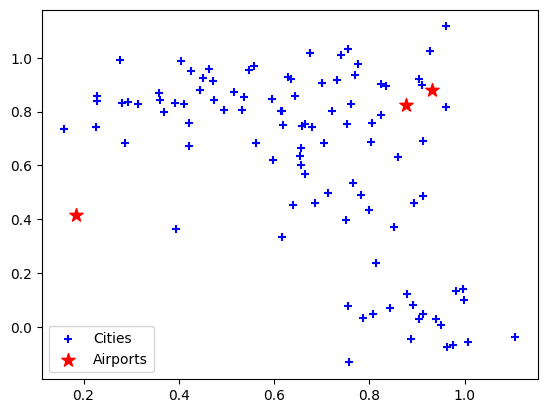

In [60]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

# gererating a set of 100 cities (cities' locations will not change)
for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

# generating initial random locations for 3 airports
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append([x,y]) 

# plotting the initial state
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [61]:
#Driving Code
def ssd(point, center):
    xc, yc = center
    xi, yi = point
    return (xc-xi)**2 + (yc-yi)**2

def gradient_ssd(point, center):
    xc, yc = center
    xi, yi = point
    grad_x = 2 * (xc - xi)
    grad_y = 2 * (yc - yi)
    return grad_x, grad_y

#variables for objective function graphing
def total_distance(airports, cities):
    total = 0
    for city in cities:
        total+= ssd(city,airports[closest(city)])
    return total

def plot_obj(ofv):
    x = np.linspace(0,101,101)
    plt.xlim(0,101)
    plt.ylim(min(objective_func_val),max(objective_func_val))
    plt.scatter(x,objective_func_val)
    plt.show()

def grad_desc(airports, cities):
    alpha=0.05
    #should only update the airport that is closest to them
    for city in cities:
        airport = airports[closest(city)] #finds the closest airport
        gradient = gradient_ssd(city, airport)
        #updates x value
        airports[closest(city)][0] -= alpha*gradient[0]
        #updates y value
        airports[closest(city)][1] -= alpha*gradient[1]
        objective_func_val.append(total_distance(airports,cities))
    plot_obj(objective_func_val)
    


def closest(point):
    airport_1 = airports[0]
    airport_2 = airports[1]
    airport_3 = airports[2]
    minimum = min(ssd(airport_1, point), ssd(airport_2,point), ssd(airport_3,point))
    if minimum == ssd(airport_1,point):
        return 0
    elif minimum == ssd(airport_2, point):
        return 1
    elif minimum == ssd(airport_3, point):
        return 2
    
        
objective_func_val = []
objective_func_val.append(total_distance(airports,cities))




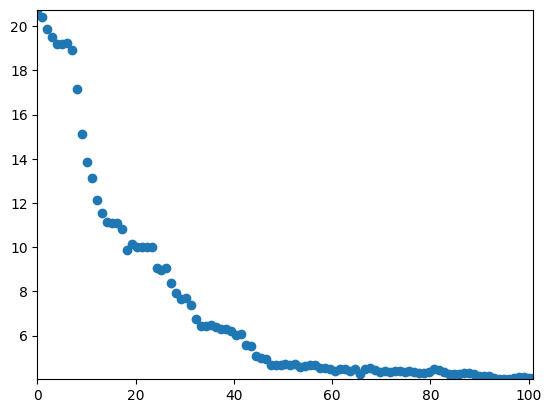

In [62]:
#Objective Value function graph
grad_desc(airports,cities)

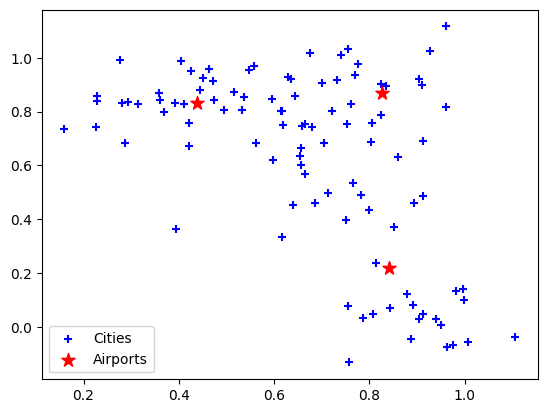

In [63]:
#Optimal Solution Graph
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt.show()